## Import Libraries & Dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CVD_cleaned.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

## Exploratory Data Analysis

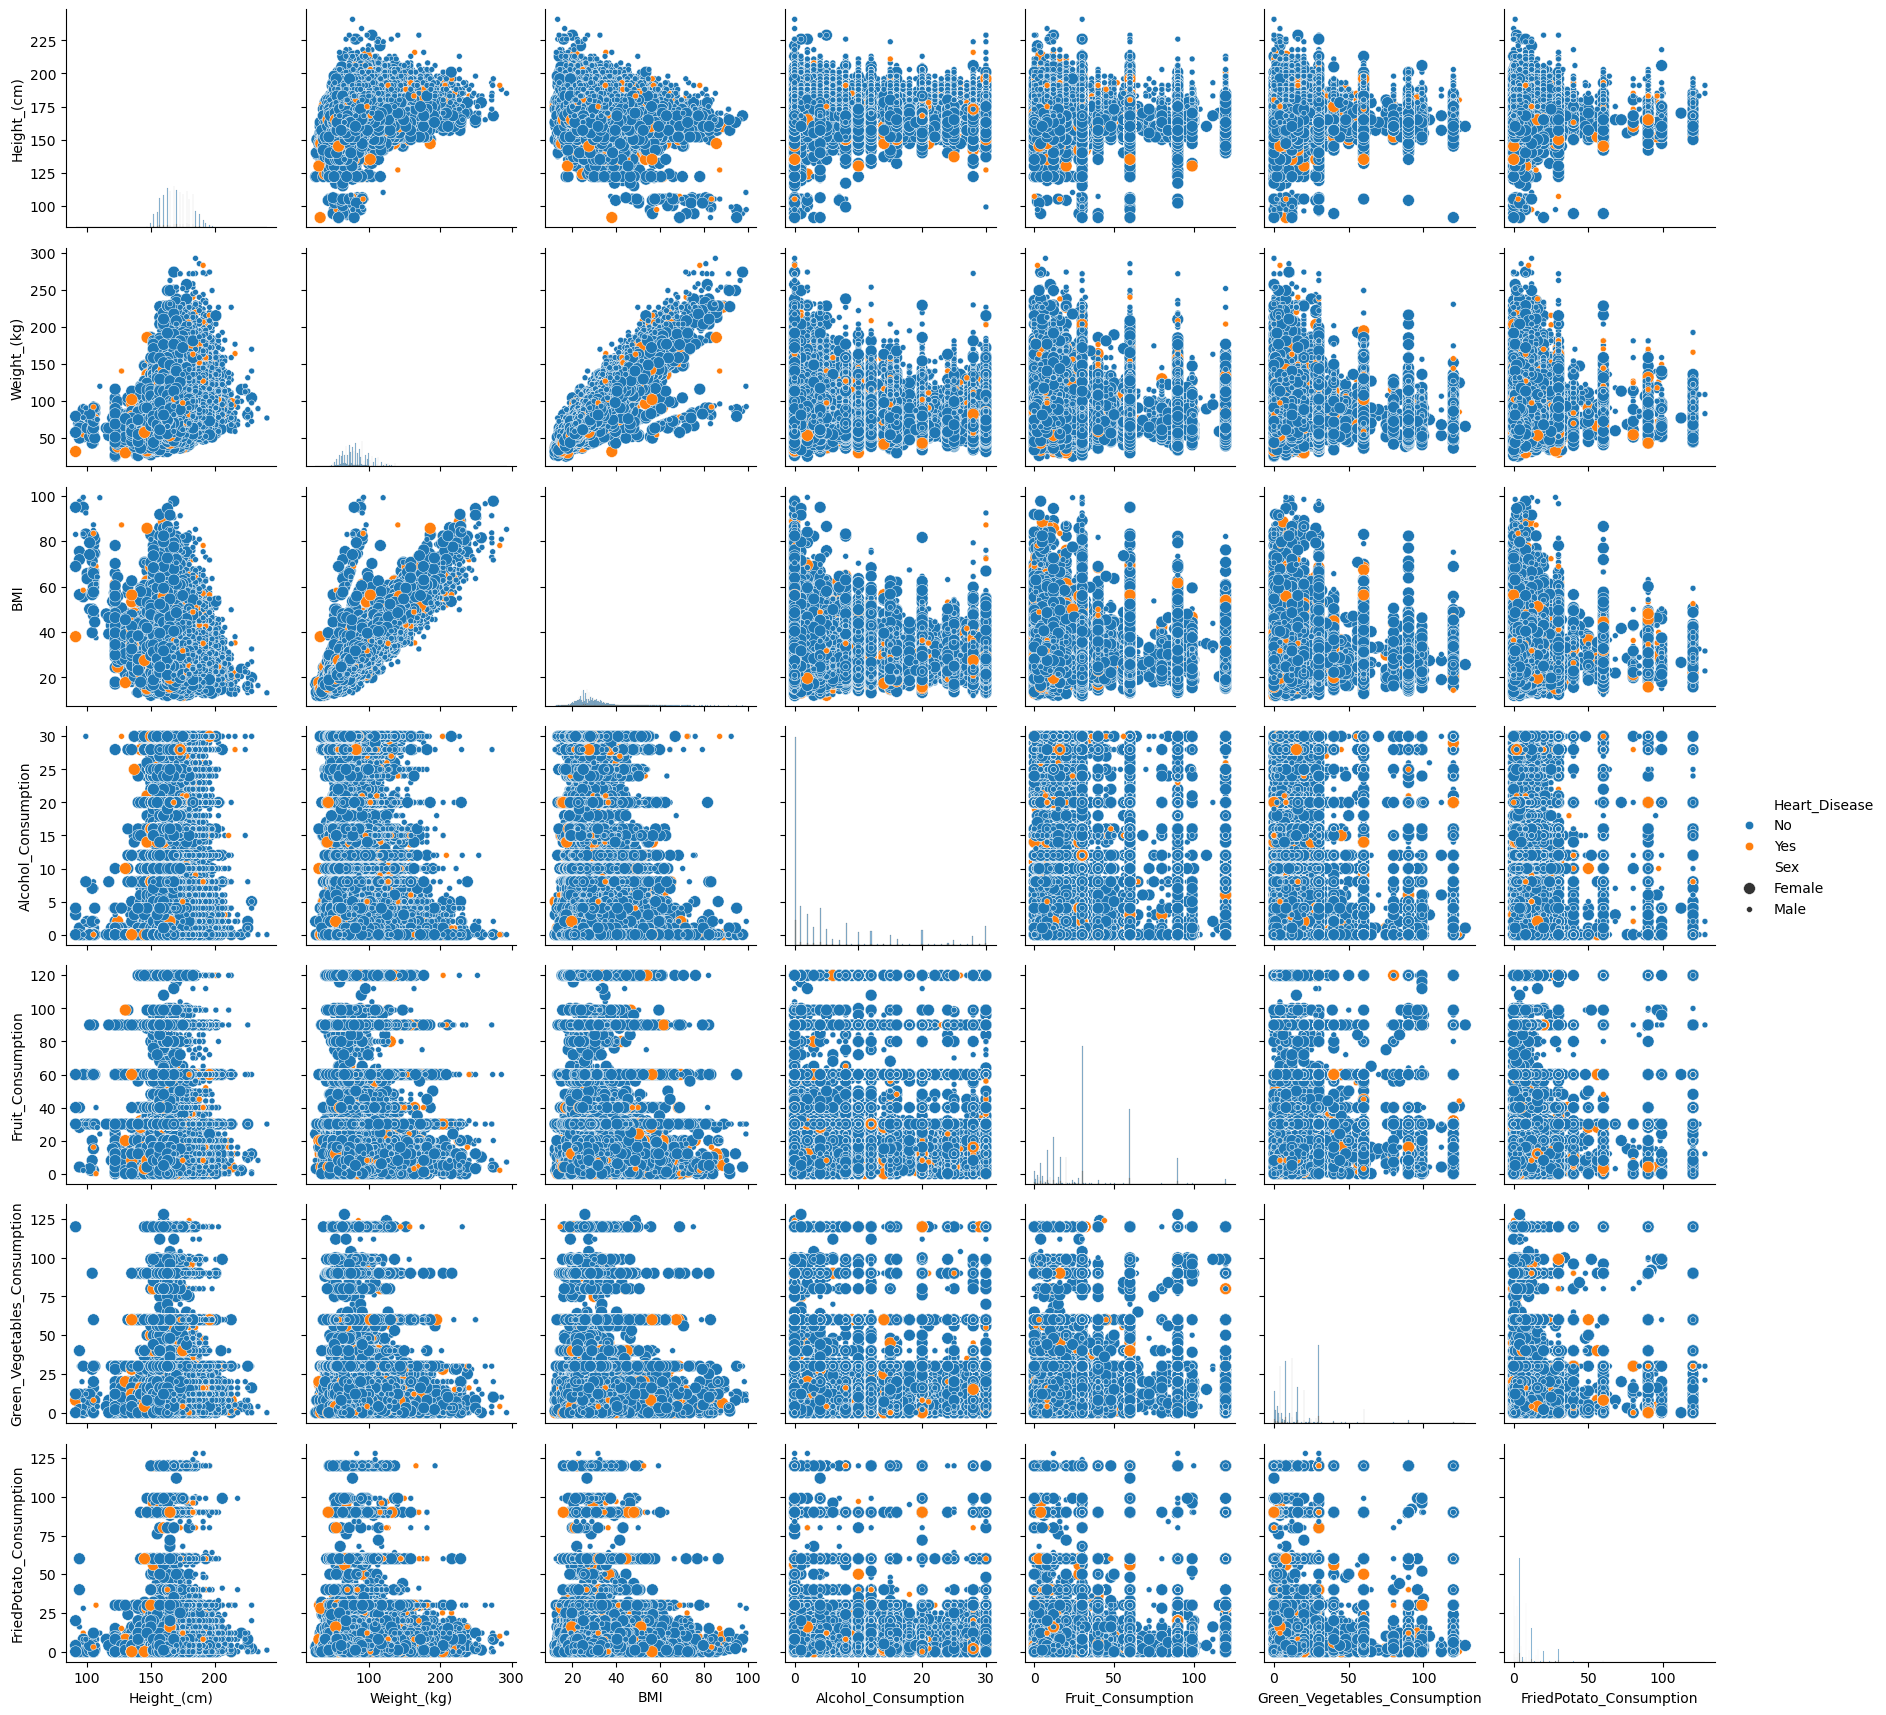

In [5]:
pg = sns.PairGrid(df, hue='Heart_Disease')
pg.map_diag(sns.histplot)
pg.map_offdiag(sns.scatterplot, size=df['Sex'])
pg.add_legend(title="", adjust_subtitles=True)

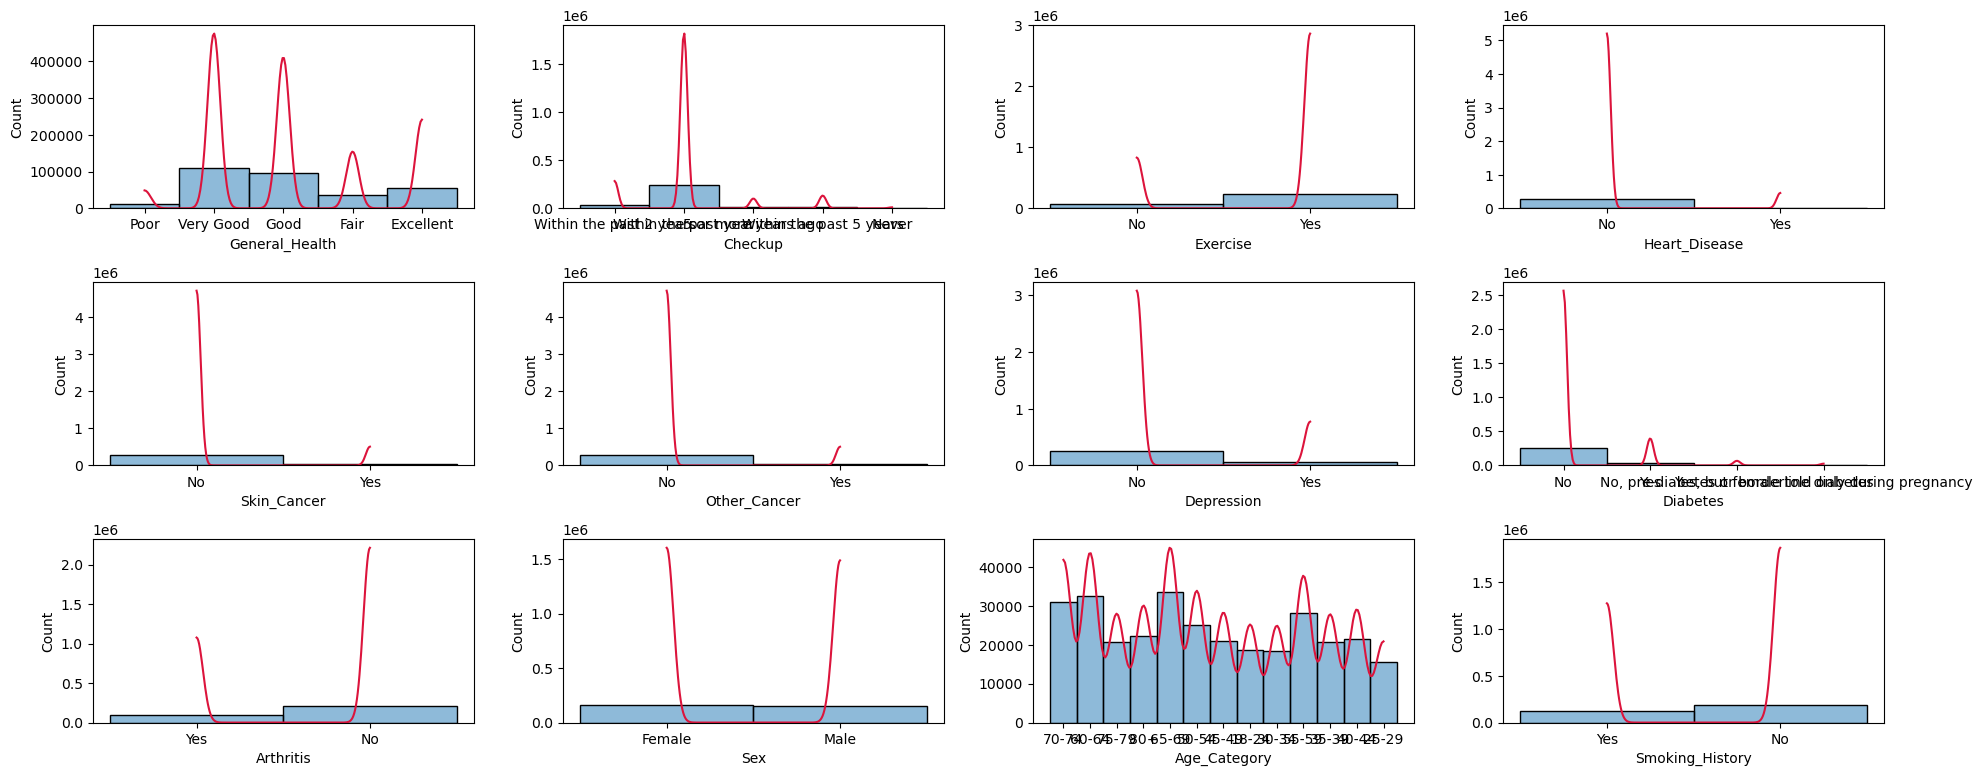

In [6]:
cat_features = df.columns[df.dtypes =='object']

fig = plt.figure(figsize=(20, 10))
plot_idx = 1

for feature in cat_features:
    ax = plt.subplot(len(cat_features)//3,len(cat_features)//3,plot_idx)
    sns.histplot(df[feature], kde=True)
    ax.lines[0].set_color('crimson')
    plot_idx +=1
    
plt.tight_layout()


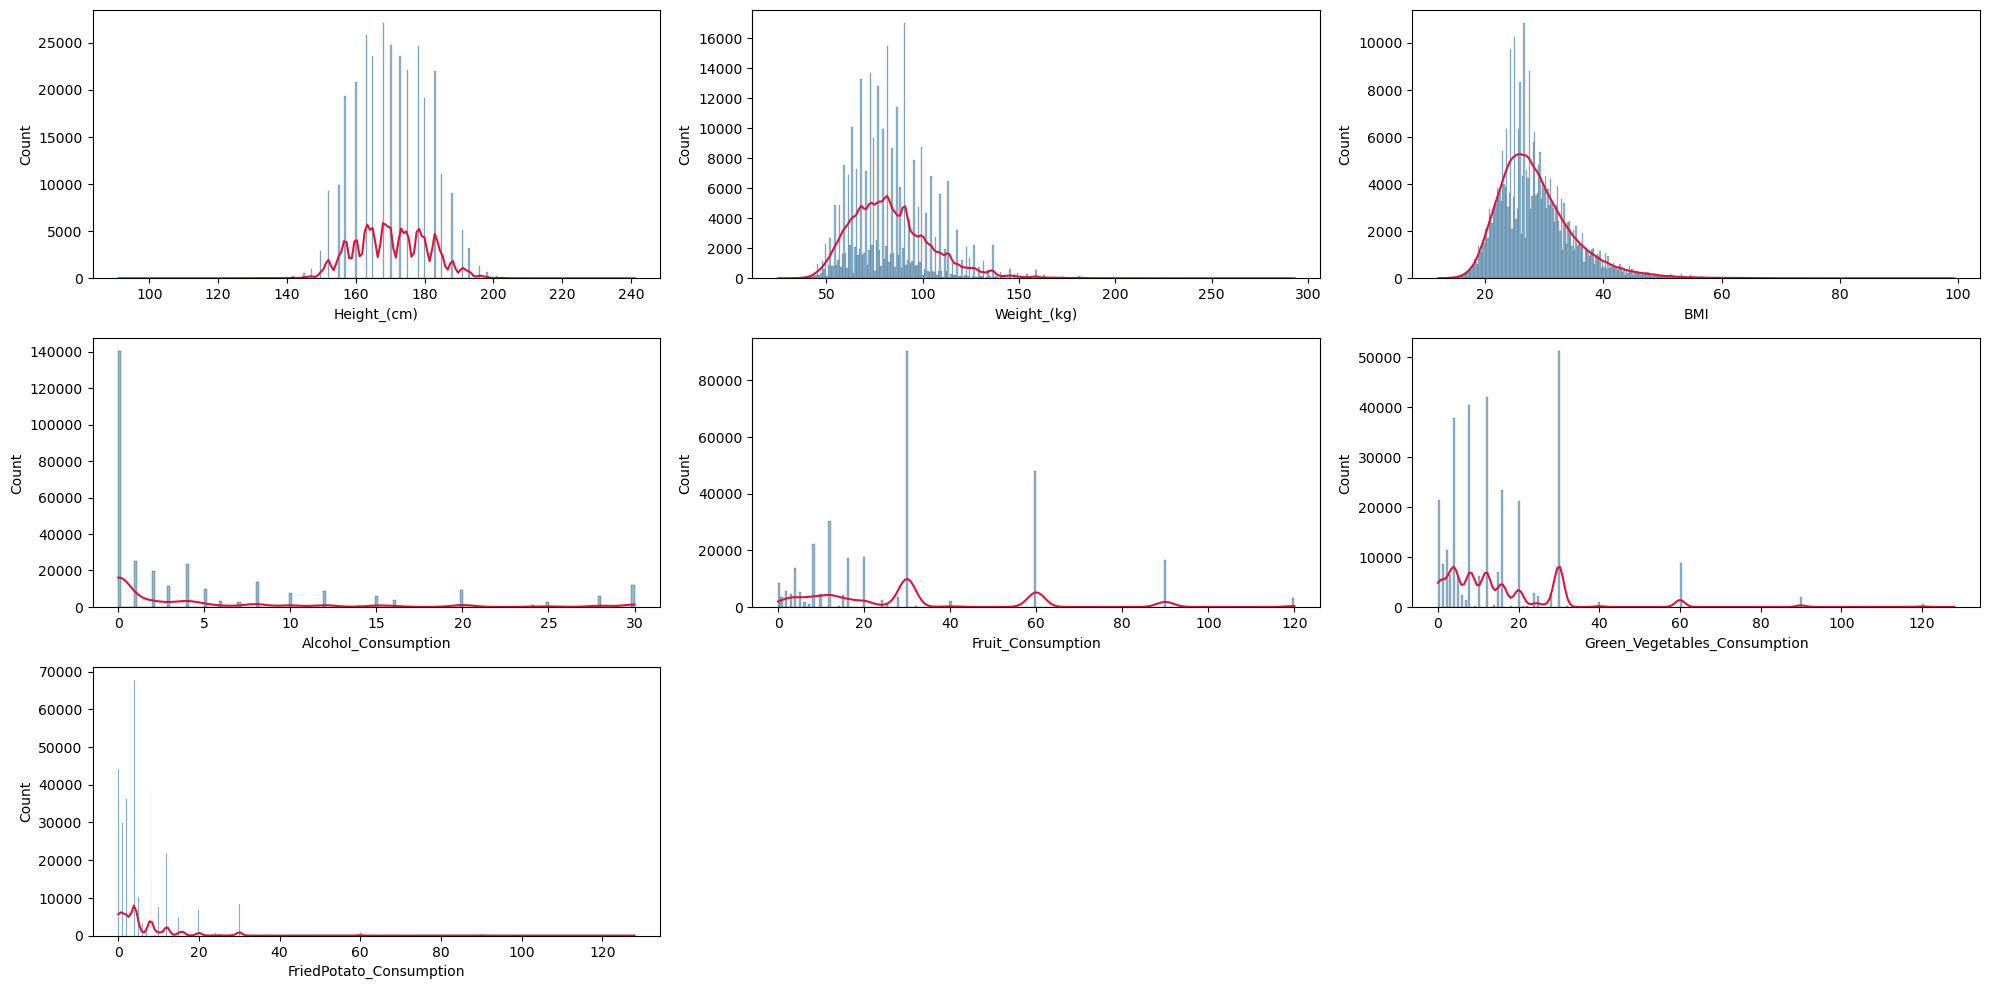

In [7]:
num_features = df.columns[df.dtypes !='object']

fig = plt.figure(figsize=(20, 10))
plot_idx = 1

for feature in num_features:
    ax = plt.subplot(len(num_features)//2,len(num_features)//2,plot_idx)
    sns.histplot(df[feature], kde=True)
    ax.lines[0].set_color('crimson')
    plot_idx +=1
    
plt.tight_layout()


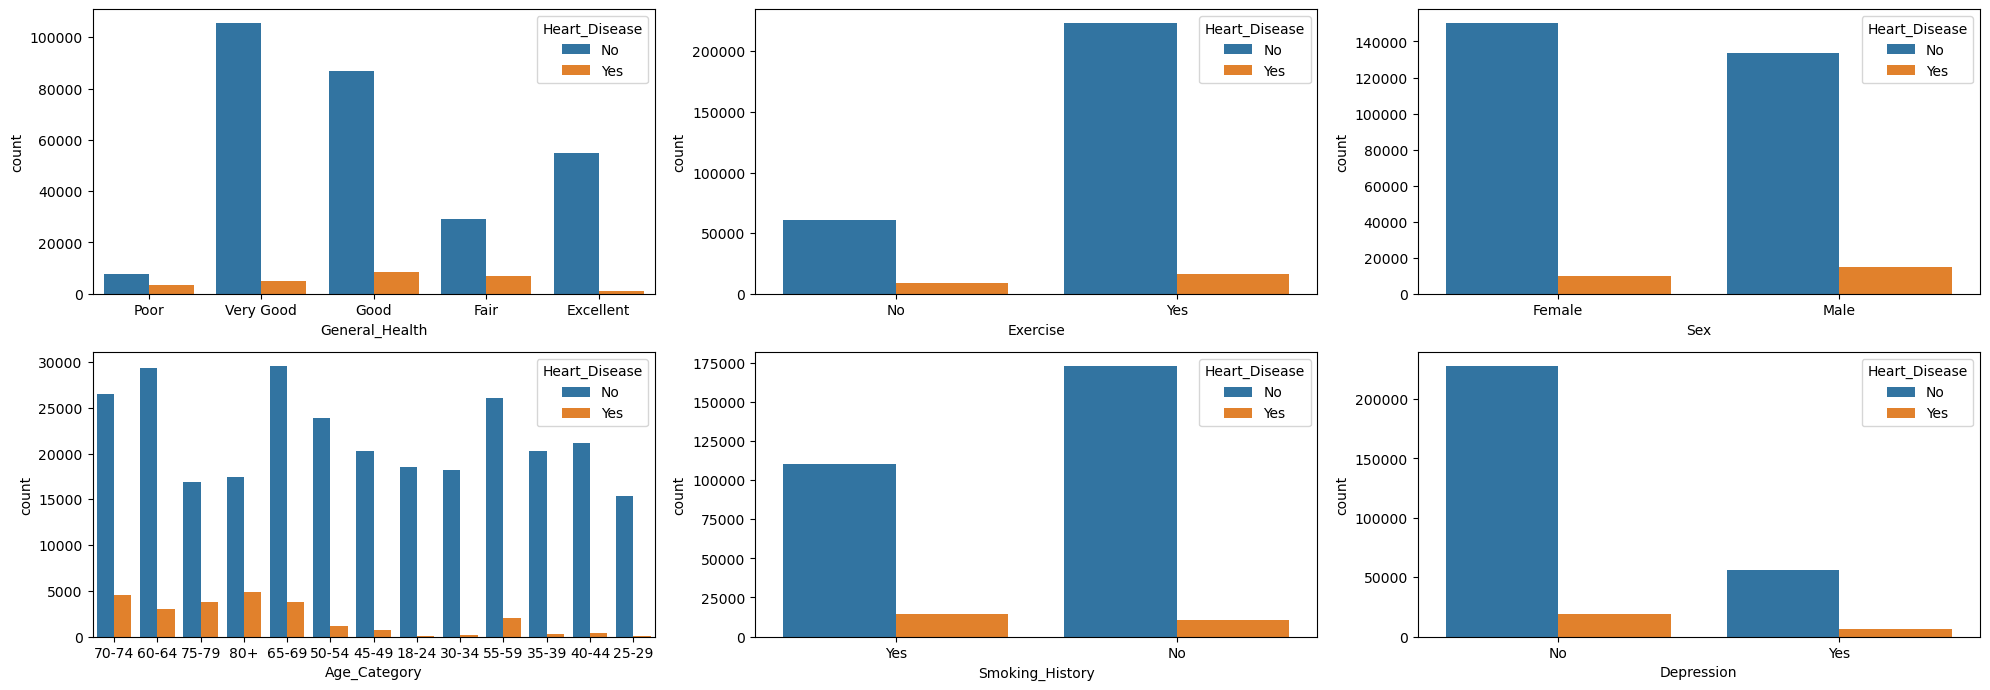

In [8]:
selected_features = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History', 'Depression']

plt.figure(figsize=(20,10))
plot_idx = 1

for variable in selected_features:
    ax = plt.subplot(len(selected_features)//2, len(selected_features)//2, plot_idx)
    sns.countplot(data=df, x = variable, hue = 'Heart_Disease')
    plot_idx += 1
plt.tight_layout()

## Feature engineering

### Encode categorical features

In [11]:
copy_df = df.copy()

cat_features = copy_df.columns[df.dtypes =='object']

le = LabelEncoder()
for feature in cat_features:
    copy_df[feature] = le.fit_transform(copy_df[feature])

copy_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


## Model training & testing

### Create train and test sets

In [13]:
X = copy_df.drop('Heart_Disease', axis=1)
y = copy_df['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [15]:
rf = RandomForestClassifier(n_estimators = 500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [16]:
y_pred = rf.predict(X_test)
pred_prob = rf.predict_proba(X_test)

In [18]:
print(f"Classification report:\n{classification_report(y_test, y_pred)}\n")
print(f"ROC-AUC Score:\n{roc_auc_score(y_test, pred_prob[:,1])}\n")

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.46      0.03      0.05      4997

    accuracy                           0.92     61771
   macro avg       0.69      0.51      0.50     61771
weighted avg       0.88      0.92      0.88     61771


ROC-AUC Score:
0.8145706073025574

